# Experimentation and uplift testing - Potato Chips Transactions 

![](https://thegrocerystoreguy.com/wp-content/uploads/2019/11/change-layout-lg.jpg)

The analysis in this notebook is to test whether the layout changes made by the chips category manager, Julia, to the trial stores 77, 86 and 88 during Feb, Mar and Apr has any statistically significant results compared to performance in sales and number of customers during the months before the change, i.e. July to Jan. We will create the metrics for comparison and use combined average of correlation and cosine distance between these metrics to choose control stores. These control stores will form a base for measuring the trial stores performance.

## Imports
Importing necessary python libraries and creating a pandas dataframe for analysis.

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [2]:
transactions = pd.read_csv('QVI_data.csv')

In [3]:
transactions.set_index(pd.to_datetime(transactions['DATE']), inplace=True)
transactions.drop('DATE', axis='columns', inplace=True)

### Creating Metrics for Selecting Control Stores

The following code cells creates metrics for selecting control stores that are similar to the trial stores 77, 86 and 88 in terms of total sales, number of customers, transactions per customers, chips per transaction and average price per unit.

##### Total sales

In [4]:
grouped = transactions.groupby([pd.Grouper(freq='M'), 'STORE_NBR'])
tot_sales = grouped['TOT_SALES'].sum().unstack()

##### Number of customers

In [5]:
n_customers = grouped['LYLTY_CARD_NBR'].nunique().unstack()

##### transactions per customer = total no of transaction / total no of customers

In [6]:
n_transactions = grouped['TXN_ID'].count().unstack()
n_txn_per_cust = n_transactions/n_customers

##### chips per transaction = total no of chips / total no of transactions

In [7]:
n_chips = grouped['PROD_QTY'].sum().unstack()
n_chips_per_txn = n_chips/n_transactions

##### avg price per unit = total sales / total no of chips

In [8]:
transactions['PRICE_PER_UNIT'] = transactions['TOT_SALES']/transactions['PROD_QTY']
avg_price_per_unit = grouped['PRICE_PER_UNIT'].mean().unstack()

##### Filter to pre trial period
We can now drop stores which have no sales in some months and filter the remaining stores to the pre trial period - July, 2018 to Jan, 2019.

In [9]:
tot_sales = tot_sales.dropna(axis='columns', how='any').loc['2018-07-31':'2019-01-31']
n_customers = n_customers.dropna(axis='columns', how='any').loc['2018-07-31':'2019-01-31']
n_txn_per_cust = n_txn_per_cust.dropna(axis='columns', how='any').loc['2018-07-31':'2019-01-31']
n_chips_per_txn = n_chips_per_txn.dropna(axis='columns', how='any').loc['2018-07-31':'2019-01-31']
avg_price_per_unit = avg_price_per_unit.dropna(axis='columns', how='any').loc['2018-07-31':'2019-01-31']

## Correlation
Now we can calculate total sales correlation and number of customers correlation across all stores.

##### Total sales correlation

In [10]:
tot_sales.corr().head()

STORE_NBR,1,2,3,4,5,6,7,8,9,10,...,263,264,265,266,267,268,269,270,271,272
STORE_NBR,,,,,,,,,,,,,,,,,,,,,
1,1.000000,-0.308766,-0.118761,-0.513184,0.536952,0.017214,0.523967,-0.848134,-0.126882,0.713433,...,-0.053964,-0.234343,-0.384712,-0.420065,-0.216874,-0.264833,-0.270635,-0.637749,0.076379,-0.747844
2,-0.308766,1.000000,-0.327268,0.128407,-0.777867,-0.028429,0.618060,0.299761,-0.218511,-0.619979,...,0.046987,-0.597502,0.101907,0.258521,0.328796,0.696589,-0.283260,-0.055504,-0.598293,-0.098484
3,-0.118761,-0.327268,1.000000,0.227754,0.041518,0.057964,-0.445417,0.132508,-0.695597,-0.065608,...,0.643292,0.558931,0.305765,-0.405014,-0.745096,0.149495,-0.007666,0.330165,0.394708,0.497761
4,-0.513184,0.128407,0.227754,1.000000,-0.118735,0.021558,-0.271051,0.818650,-0.055730,-0.563440,...,0.329687,0.102785,-0.116885,-0.098043,-0.029446,-0.282850,0.463409,0.255360,0.318078,0.651821
5,0.536952,-0.777867,0.041518,-0.118735,1.000000,-0.358033,-0.329786,-0.395284,0.411714,0.807281,...,-0.172271,0.516545,-0.631768,-0.157137,-0.225077,-0.780919,-0.019174,-0.082446,0.162019,-0.288651


##### Number of customers correlation

In [11]:
n_customers.corr().head()

STORE_NBR,1,2,3,4,5,6,7,8,9,10,...,263,264,265,266,267,268,269,270,271,272
STORE_NBR,,,,,,,,,,,,,,,,,,,,,
1,1.000000,-0.588159,-0.125082,-0.216628,0.420583,0.130449,0.414716,-0.673530,-0.480188,0.476696,...,-0.108577,-0.046347,-0.135267,-0.653552,-0.419627,-0.329416,-0.874632,-0.532327,0.048899,-0.752916
2,-0.588159,1.000000,-0.329797,0.847031,-0.520676,0.196846,0.158633,0.876319,0.286757,-0.671037,...,0.147566,-0.337857,-0.140779,0.134997,0.345234,0.208605,0.625751,0.340709,-0.221527,0.349648
3,-0.125082,-0.329797,1.000000,-0.224087,0.338354,0.043144,-0.547030,-0.024829,-0.680896,-0.144126,...,0.641976,0.514751,0.428780,-0.209915,-0.672094,0.456479,0.015290,0.107774,-0.160820,0.573619
4,-0.216628,0.847031,-0.224087,1.000000,-0.135340,0.063489,0.228446,0.719480,-0.028837,-0.429989,...,0.215175,-0.160653,-0.239088,-0.190570,0.109564,0.002846,0.183774,0.338810,-0.384524,0.123485
5,0.420583,-0.520676,0.338354,-0.135340,1.000000,-0.644027,-0.079831,-0.264509,-0.321320,0.606830,...,0.091783,0.455898,-0.429716,0.000000,-0.372918,-0.572323,-0.493359,0.278068,-0.510200,-0.387635


## Cosine Distance
Now we can calculate cosine distance for total sales and number of customers across all stores.

##### Total sales distance

In [12]:
tot_sales_dist = pd.DataFrame(squareform(pdist(tot_sales.T, metric='cosine')), columns=tot_sales.columns, index=tot_sales.columns)
tot_sales_dist = 1 - tot_sales_dist
tot_sales_dist.head()

STORE_NBR,1,2,3,4,5,6,7,8,9,10,...,263,264,265,266,267,268,269,270,271,272
STORE_NBR,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.973015,0.980758,0.971617,0.987835,0.973122,0.988016,0.957738,0.977026,0.986983,...,0.942049,0.962052,0.942289,0.973599,0.868386,0.949893,0.977298,0.969328,0.980581,0.963680
2,0.973015,1.000000,0.991092,0.992016,0.988006,0.983164,0.996740,0.991073,0.988091,0.992633,...,0.956706,0.969753,0.971121,0.993382,0.909891,0.986425,0.989819,0.990210,0.984487,0.988004
3,0.980758,0.991092,1.000000,0.995467,0.996477,0.987498,0.993554,0.991705,0.989675,0.997731,...,0.969297,0.989193,0.976222,0.992461,0.879139,0.976296,0.995370,0.995907,0.995927,0.995648
4,0.971617,0.992016,0.995467,1.000000,0.993447,0.985071,0.991501,0.997466,0.990941,0.994195,...,0.964723,0.982899,0.967563,0.991559,0.895250,0.966714,0.996299,0.993980,0.994185,0.996505
5,0.987835,0.988006,0.996477,0.993447,1.000000,0.983504,0.993837,0.987589,0.995920,0.999095,...,0.955534,0.988839,0.963047,0.993531,0.892176,0.963698,0.995155,0.993510,0.994493,0.990406


##### Number of customers distance

In [13]:
n_customers_dist = pd.DataFrame(squareform(pdist(n_customers.T, metric='cosine')), columns=n_customers.columns, index=n_customers.columns)
n_customers_dist = 1- n_customers_dist
n_customers_dist.head()

STORE_NBR,1,2,3,4,5,6,7,8,9,10,...,263,264,265,266,267,268,269,270,271,272
STORE_NBR,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.980817,0.986832,0.983807,0.990617,0.981596,0.990579,0.972691,0.976244,0.991166,...,0.917604,0.975620,0.960595,0.972224,0.884281,0.969956,0.983562,0.977271,0.987834,0.968921
2,0.980817,1.000000,0.995937,0.999270,0.994642,0.989781,0.996962,0.998380,0.994633,0.993484,...,0.935480,0.982415,0.972034,0.992975,0.926372,0.988568,0.998693,0.995759,0.995994,0.993811
3,0.986832,0.995937,1.000000,0.995744,0.998381,0.989363,0.996189,0.993433,0.990781,0.996830,...,0.943322,0.990485,0.979272,0.992128,0.906804,0.990698,0.998441,0.995297,0.997467,0.995253
4,0.983807,0.999270,0.995744,1.000000,0.995501,0.988188,0.996854,0.997361,0.992100,0.993823,...,0.937133,0.983612,0.969887,0.990120,0.920223,0.986128,0.997312,0.995510,0.994922,0.991767
5,0.990617,0.994642,0.998381,0.995501,1.000000,0.983813,0.996847,0.991633,0.991676,0.998720,...,0.934445,0.990277,0.969688,0.992703,0.910328,0.982592,0.997072,0.995777,0.996045,0.989456


## Combined Average Score
We now average the correlation and cosine distance score for total sales and number of customers and then average the result.

##### Total sales correlation and distance - Average

In [14]:
totsales_scoreavg = 0.5 * tot_sales.corr() + 0.5 * tot_sales_dist
totsales_scoreavg.head()

STORE_NBR,1,2,3,4,5,6,7,8,9,10,...,263,264,265,266,267,268,269,270,271,272
STORE_NBR,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.332125,0.430999,0.229216,0.762394,0.495168,0.755991,0.054802,0.425072,0.850208,...,0.444043,0.363854,0.278789,0.276767,0.325756,0.342530,0.353331,0.165789,0.528480,0.107918
2,0.332125,1.000000,0.331912,0.560211,0.105069,0.477368,0.807400,0.645417,0.384790,0.186327,...,0.501846,0.186126,0.536514,0.625951,0.619344,0.841507,0.353279,0.467353,0.193097,0.444760
3,0.430999,0.331912,1.000000,0.611611,0.518997,0.522731,0.274069,0.562106,0.147039,0.466062,...,0.806295,0.774062,0.640994,0.293724,0.067022,0.562896,0.493852,0.663036,0.695317,0.746705
4,0.229216,0.560211,0.611611,1.000000,0.437356,0.503315,0.360225,0.908058,0.467605,0.215377,...,0.647205,0.542842,0.425339,0.446758,0.432902,0.341932,0.729854,0.624670,0.656131,0.824163
5,0.762394,0.105069,0.518997,0.437356,1.000000,0.312735,0.332025,0.296153,0.703817,0.903188,...,0.391631,0.752692,0.165640,0.418197,0.333549,0.091390,0.487990,0.455532,0.578256,0.350878


##### Number of customers correlation and distance - Average

In [15]:
ncustomers_scoreavg = 0.5 * n_customers.corr() + 0.5 * n_customers_dist
ncustomers_scoreavg.head()

STORE_NBR,1,2,3,4,5,6,7,8,9,10,...,263,264,265,266,267,268,269,270,271,272
STORE_NBR,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.196329,0.430875,0.383590,0.705600,0.556022,0.702647,0.149580,0.248028,0.733931,...,0.404513,0.464637,0.412664,0.159336,0.232327,0.320270,0.054465,0.222472,0.518366,0.108003
2,0.196329,1.000000,0.333070,0.923150,0.236983,0.593314,0.577797,0.937349,0.640695,0.161224,...,0.541523,0.322279,0.415627,0.563986,0.635803,0.598586,0.812222,0.668234,0.387234,0.671729
3,0.430875,0.333070,1.000000,0.385829,0.668368,0.516253,0.224580,0.484302,0.154943,0.426352,...,0.792649,0.752618,0.704026,0.391106,0.117355,0.723588,0.506865,0.551536,0.418324,0.784436
4,0.383590,0.923150,0.385829,1.000000,0.430080,0.525839,0.612650,0.858421,0.481632,0.281917,...,0.576154,0.411479,0.365400,0.399775,0.514894,0.494487,0.590543,0.667160,0.305199,0.557626
5,0.705600,0.236983,0.668368,0.430080,1.000000,0.169893,0.458508,0.363562,0.335178,0.802775,...,0.513114,0.723088,0.269986,0.496351,0.268705,0.205135,0.251856,0.636922,0.242922,0.300910


##### Combined score - Total sales score and Number of customers score - Average

In [16]:
combined_scoreavg = 0.5 * totsales_scoreavg + 0.5 * ncustomers_scoreavg
combined_scoreavg.head()

STORE_NBR,1,2,3,4,5,6,7,8,9,10,...,263,264,265,266,267,268,269,270,271,272
STORE_NBR,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.264227,0.430937,0.306403,0.733997,0.525595,0.729319,0.102191,0.336550,0.792070,...,0.424278,0.414245,0.345726,0.218051,0.279041,0.331400,0.203898,0.194131,0.523423,0.107960
2,0.264227,1.000000,0.332491,0.741681,0.171026,0.535341,0.692599,0.791383,0.512742,0.173775,...,0.521685,0.254202,0.476071,0.594969,0.627573,0.720047,0.582751,0.567793,0.290165,0.558245
3,0.430937,0.332491,1.000000,0.498720,0.593683,0.519492,0.249324,0.523204,0.150991,0.446207,...,0.799472,0.763340,0.672510,0.342415,0.092188,0.643242,0.500359,0.607286,0.556820,0.765571
4,0.306403,0.741681,0.498720,1.000000,0.433718,0.514577,0.486437,0.883239,0.474618,0.248647,...,0.611679,0.477161,0.395369,0.423267,0.473898,0.418209,0.660198,0.645915,0.480665,0.690894
5,0.733997,0.171026,0.593683,0.433718,1.000000,0.241314,0.395266,0.329857,0.519498,0.852982,...,0.452373,0.737890,0.217813,0.457274,0.301127,0.148262,0.369923,0.546227,0.410589,0.325894


##### Creating a dataframe of Score and Rank
To choose the appropriate control stores we can rank the combined average score and choose the store with the second highest rank. Store with the highest rank will be the trial store since the most similar store to trial store will be itself.

In [17]:
trial_stores = [77, 86, 88]
rank = combined_scoreavg.loc[:,trial_stores].rank(ascending=False)
scoreandrank = combined_scoreavg.loc[:,trial_stores].join(rank, lsuffix='_score', rsuffix='_rank')
scoreandrank.loc[:5, ['77_score', '77_rank', '86_score', '86_rank', '88_score', '88_rank']]

STORE_NBR,77_score,77_rank,86_score,86_rank,88_score,88_rank
STORE_NBR,,,,,,
1,0.590467,91.0,0.727348,37.0,0.774231,12.0
2,0.283464,233.0,0.374080,179.0,0.367457,200.0
3,0.908255,5.0,0.344247,195.0,0.502698,119.0
4,0.353297,213.0,0.445153,146.0,0.220464,251.0
5,0.560607,112.0,0.493872,128.0,0.540189,104.0


##### Control Store for Trial Store 77
Control store for trial store 77 is 233 with the second highest rank.

In [18]:
scoreandrank.loc[:,['77_rank', '77_score']].sort_values('77_rank').head(2)

STORE_NBR,77_rank,77_score
STORE_NBR,,
77,1.0,1.00000
233,2.0,0.97248


##### Control Store for Trial Store 86
Control store for trial store 86 is 155 with the second highest rank.

In [19]:
scoreandrank.loc[:,['86_rank', '86_score']].sort_values('86_rank').head(2)

STORE_NBR,86_rank,86_score
STORE_NBR,,
86,1.0,1.000000
155,2.0,0.954979


##### Control Store for Trial Store 88
Control store for trial store 88 is 178 with the second highest rank.

In [20]:
scoreandrank.loc[:,['88_rank', '88_score']].sort_values('88_rank').head(2)

STORE_NBR,88_rank,88_score
STORE_NBR,,
88,1.0,1.00000
178,2.0,0.91766


###### Helper function for visualization

In [21]:
plt.rcParams.update({'font.size': 15})

def trial_control_viz(trial_store, control_store):
    fig, axs = plt.subplots(2, 1, figsize=(20,7), sharex='col')
    
    axs[0].plot(tot_sales.index, tot_sales[trial_store], marker='o', color='g', label=f'Trial Store - {trial_store}')
    axs[0].plot(tot_sales.index, tot_sales[control_store], marker='o', linestyle='--', color='b', 
                label=f'Control Store - {control_store}')
    axs[0].set_title(f'Total Sales for Store {trial_store} and {control_store} - Pre Trial')
    axs[0].legend(); axs[0].set_ylabel('Sales')

    axs[1].plot(n_customers.index, n_customers[trial_store], marker='o', color='g', label=f'Trial Store - {trial_store}')
    axs[1].plot(n_customers.index, n_customers[control_store], marker='o', linestyle='--', color='b', 
                label=f'Control Store - {control_store}')
    axs[1].set_title(f'Number of Customers for Store {trial_store} and {control_store} - Pre Trial')
    axs[1].legend(); axs[1].set_xlabel('Month'); axs[1].set_ylabel('Customers')
    
    for ax in axs.flatten():
        ax.legend(loc='upper right')
    plt.tight_layout()

##### Visualizing trial and control store trend simillarity in total sales and number of customers
The following visualizations confirm that each chosen control store have a similar sales and number of customers pattern with the respective trial stores in the pre trial period. We can now proceed with further analysis on performance during the trial period.

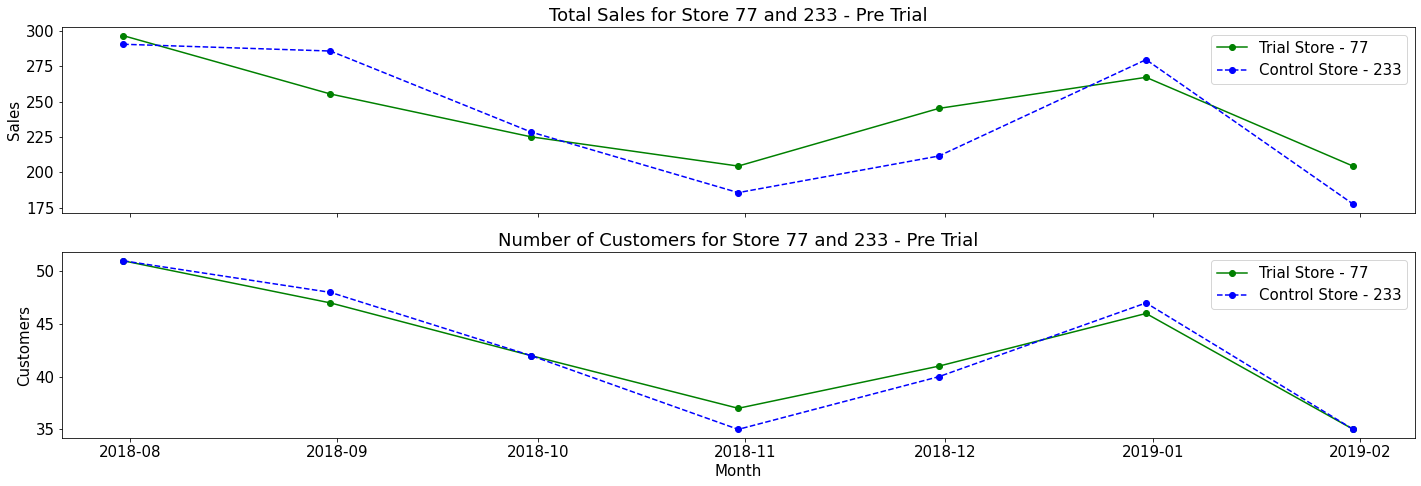

In [22]:
trial_control_viz(77, 233)

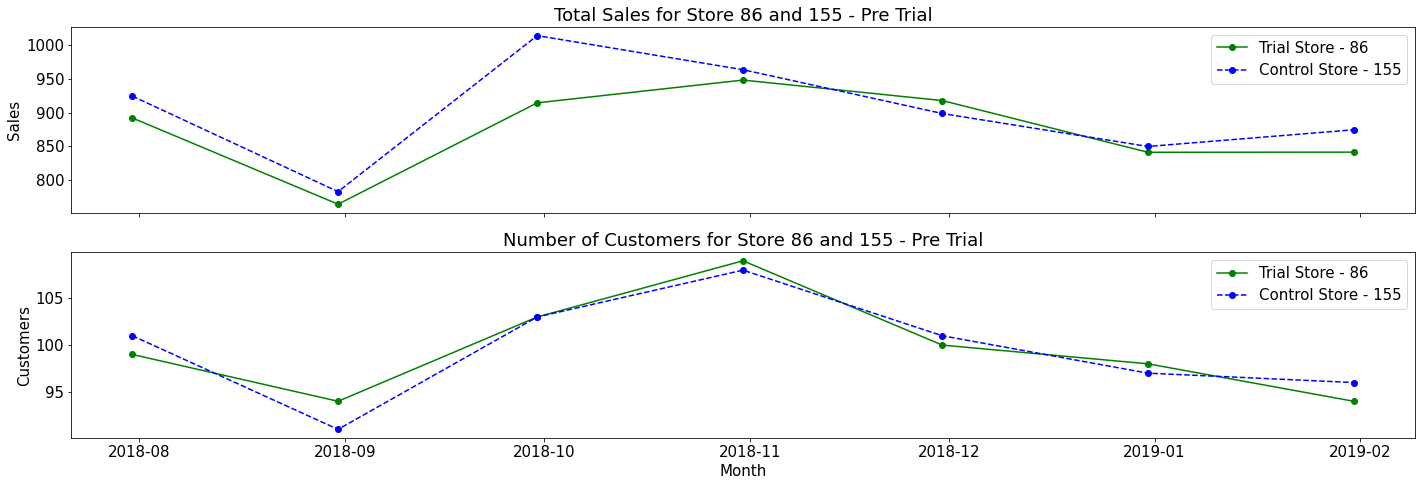

In [23]:
trial_control_viz(86, 155)

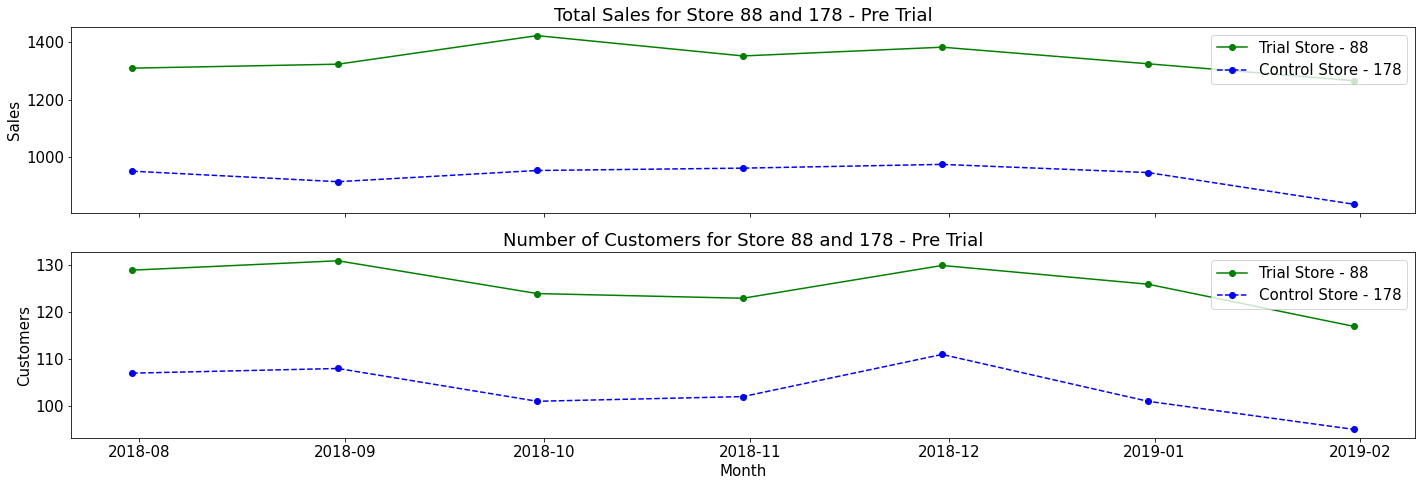

In [24]:
trial_control_viz(88, 178)

##### Sales performance (in percentage) during pre trial and trial period for each trial store

In [25]:
pretrialsalesperformance_77 = (tot_sales[77]/tot_sales[233]) - 1
pretrialsalesperformance_86 = (tot_sales[86]/tot_sales[155]) - 1
pretrialsalesperformance_88 = (tot_sales[88]/tot_sales[178]) - 1

tot_sales_trial = grouped['TOT_SALES'].sum().unstack().loc['2019-02-28':'2019-04-30']

trialsalesperformance_77 = (tot_sales_trial[77]/tot_sales_trial[233]) -1
trialsalesperformance_86 = (tot_sales_trial[86]/tot_sales_trial[155]) -1
trialsalesperformance_88 = (tot_sales_trial[88]/tot_sales_trial[178]) -1

### Hypothesis test on sales performance using 95% confidence interval.
##### Null Hypothesis: Sales performance for trial stores remains the same (Store Layout Change had no effect on Sales).
##### Alternative Hypothesis: Sales performance for trial stores is different (Store Layout Change did have an effect).
We will conduct a two-tailed T-test with a 5% probability threshold (assuming independence in outcomes) to either reject or accept the null hypothesis. 

In [26]:
from scipy.stats import ttest_ind

ttest_ind(pretrialsalesperformance_77, trialsalesperformance_77)

Ttest_indResult(statistic=-2.226021196267988, pvalue=0.056647517597102716)

In [27]:
ttest_ind(pretrialsalesperformance_86, trialsalesperformance_86)

Ttest_indResult(statistic=-2.2997498897794553, pvalue=0.05049054150613317)

In [28]:
ttest_ind(pretrialsalesperformance_88, trialsalesperformance_88)

Ttest_indResult(statistic=1.4427778597522258, pvalue=0.1870680487017525)

Looking at the pvalues for each trial stores, we fail to reject the null hypothesis as the pvalue is not less than 5%. We can conclude that the layout change had no effect on sales.

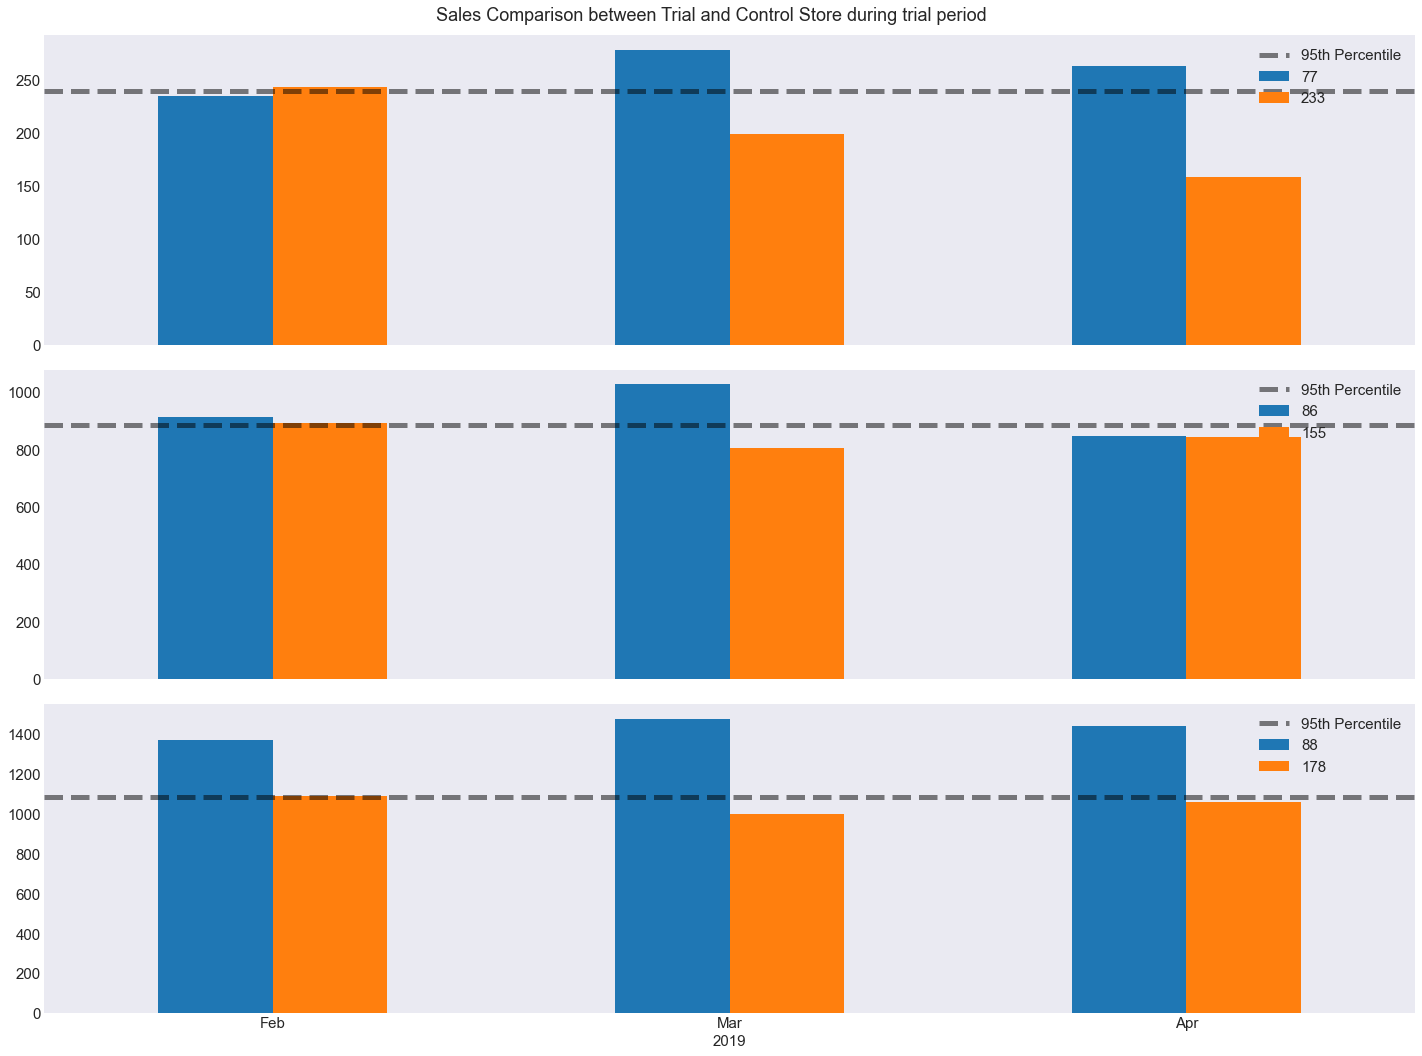

In [29]:
plt.style.use('seaborn-dark')
fig, axs = plt.subplots(3, 1, figsize=(20, 15), sharex='col')
tot_sales_trial[[77, 233]].plot(kind='bar', rot=0, ax=axs[0], legend=False)
tot_sales_trial[[86, 155]].plot(kind='bar', rot=0, ax=axs[1], legend=False)
tot_sales_trial[[88, 178]].plot(kind='bar', rot=0, ax=axs[2], legend=False)

for ax, control_store in zip(axs.flatten(), [233, 155, 178]):
    threshold = np.percentile(tot_sales_trial[control_store], 95)
    ax.axhline(y=threshold, linewidth=5, alpha=0.5, linestyle='--', color='black', label='95th Percentile')
    ax.legend(loc='upper right')

fig.suptitle('Sales Comparison between Trial and Control Store during trial period', fontsize=18)
plt.xticks(ticks=[0, 1, 2], labels=['Feb', 'Mar', 'Apr'])
plt.xlabel('2019')
plt.tight_layout()

Although it looks like the trial stores have mostly outperformed the control stores in absolute value, statistically speaking, the results are not significant to conclude that the sales are different during the trial period as we saw earlier. Let's now perform the same test for the number of customers.

##### Number of customers (in percentage) during pre trial and trial period for each trial store

In [30]:
pretrialcustomers_77 = (n_customers[77] / n_customers[233]) - 1
pretrialcustomers_86 = (n_customers[86] / n_customers[155]) - 1
pretrialcustomers_88 = (n_customers[88] / n_customers[178]) - 1

n_customers_trial = grouped['LYLTY_CARD_NBR'].nunique().unstack().loc['2019-02-28':'2019-04-30']

trialcustomers_77 = (n_customers_trial[77] / n_customers_trial[233]) - 1
trialcustomers_86 = (n_customers_trial[86] / n_customers_trial[155]) - 1
trialcustomers_88 = (n_customers_trial[88] / n_customers_trial[178]) - 1

### Hypothesis test on number of customers using 95% confidence interval.
##### Null Hypothesis: Number of customers for trial stores remains the same (Store Layout Change had no effect on Customers).
##### Alternative Hypothesis: Number of customers  for trial stores is different (Store Layout Change did have an effect).
We will again conduct a two-tailed T-test with a 5% probability threshold (assuming independence in outcomes) to either reject or accept the null hypothesis. 

In [31]:
ttest_ind(pretrialcustomers_77, trialcustomers_77)

Ttest_indResult(statistic=-2.6822962836402557, pvalue=0.027826804718543475)

In [32]:
ttest_ind(pretrialcustomers_86, trialcustomers_86)

Ttest_indResult(statistic=-4.476509998955232, pvalue=0.002065325703864027)

In [33]:
ttest_ind(pretrialcustomers_88, trialcustomers_88)

Ttest_indResult(statistic=3.4486905569933564, pvalue=0.008711577701864976)

The pvalues are lesser than our thereshold of 5% for each of the trial stores, hence we can reject the null hypothesis and conclude that the layout change did have an effect on the number of customers.

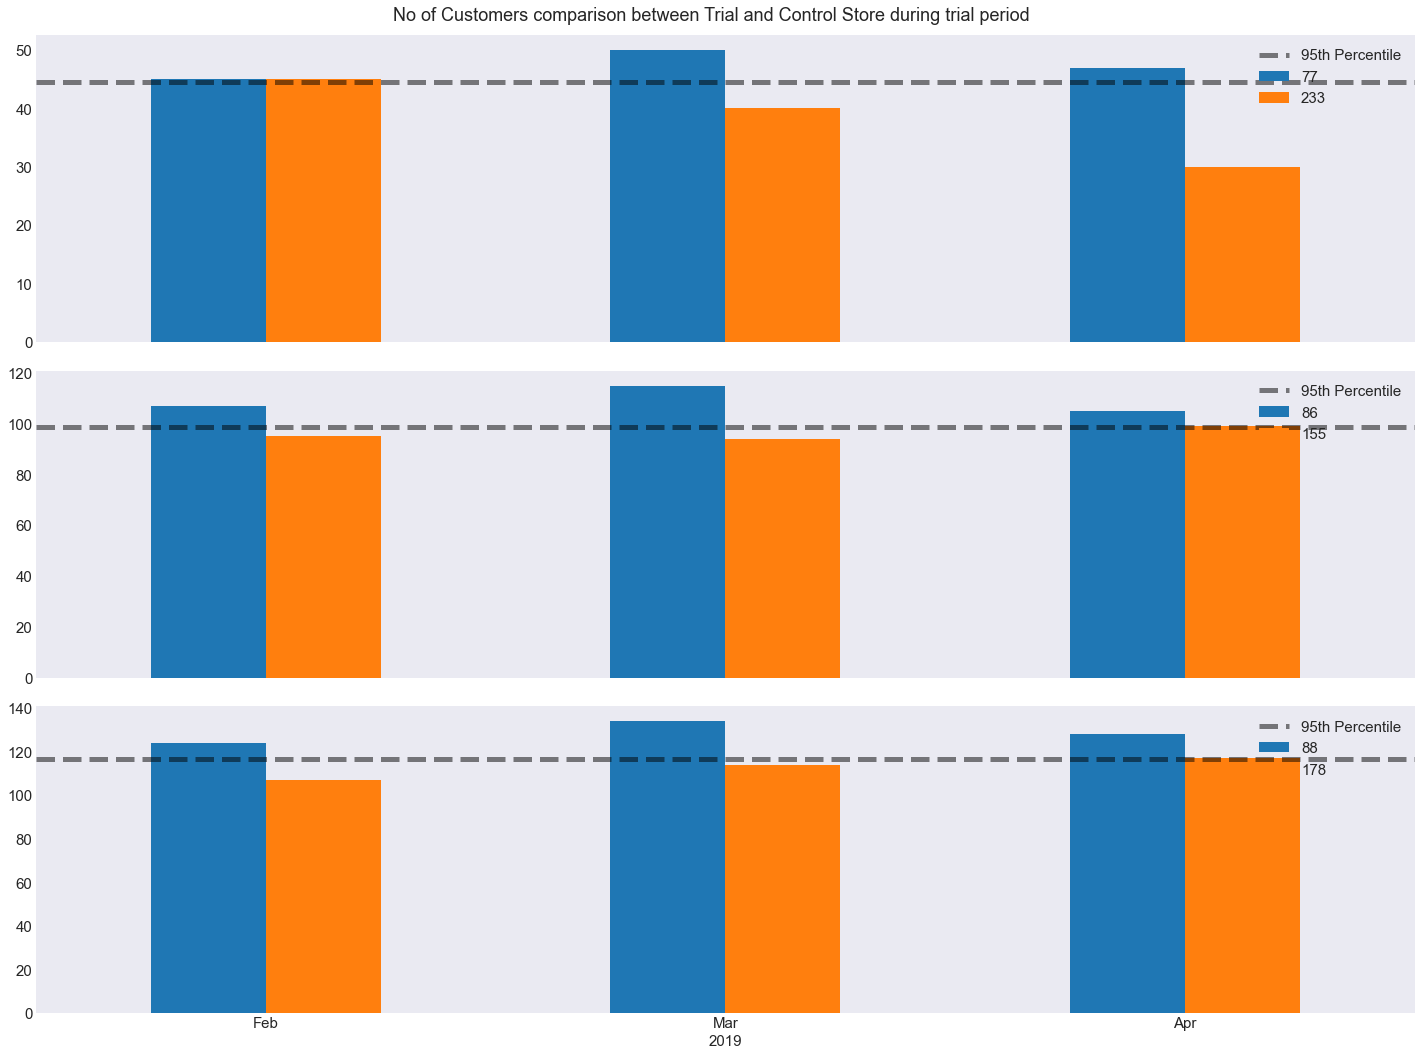

In [34]:
plt.style.use('seaborn-dark')
fig, axs = plt.subplots(3, 1, figsize=(20, 15), sharex='col')
n_customers_trial[[77, 233]].plot(kind='bar', rot=0, ax=axs[0], legend=False)
n_customers_trial[[86, 155]].plot(kind='bar', rot=0, ax=axs[1], legend=False)
n_customers_trial[[88, 178]].plot(kind='bar', rot=0, ax=axs[2], legend=False)

for ax, control_store in zip(axs.flatten(), [233, 155, 178]):
    threshold = np.percentile(n_customers_trial[control_store], 95)
    ax.axhline(y=threshold, linewidth=5, alpha=0.5, linestyle='--', color='black', label='95th Percentile')
    ax.legend(loc='upper right')
    
fig.suptitle('No of Customers comparison between Trial and Control Store during trial period', fontsize=18)
plt.xticks(ticks=[0, 1, 2], labels=['Feb', 'Mar', 'Apr'])
plt.xlabel('2019')
plt.tight_layout()

The visualization confirms that the customer number is statistically significant and increased in the trial stores during the trial period. We can now report our findings to Julia.